<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/3rdWeekTask/Regression_model_Decision_Tree_dan_k_NN_For_MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                   Model         MSE        R²
0          Decision Tree   20.586910  0.920106
1    K-Nearest Neighbors  101.261173  0.607023
2      Linear Regression   75.467499  0.707124
3  Polynomial Regression   42.771164  0.834012


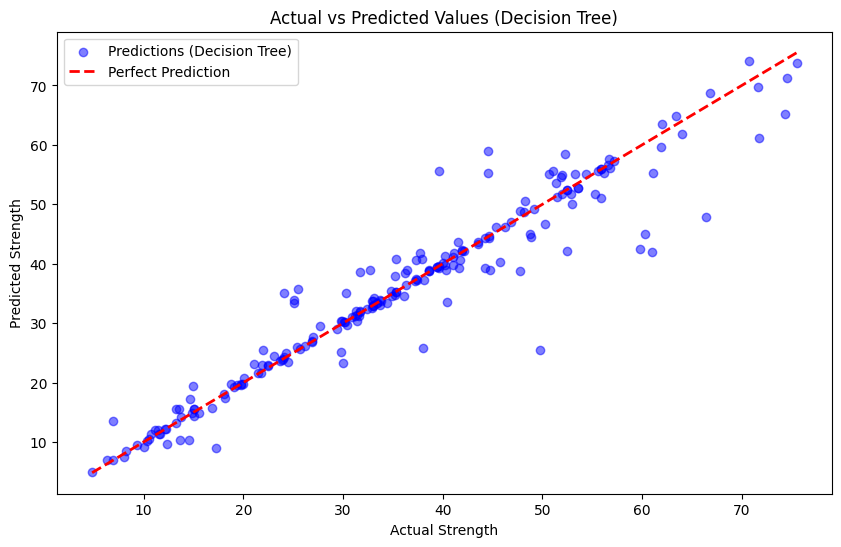

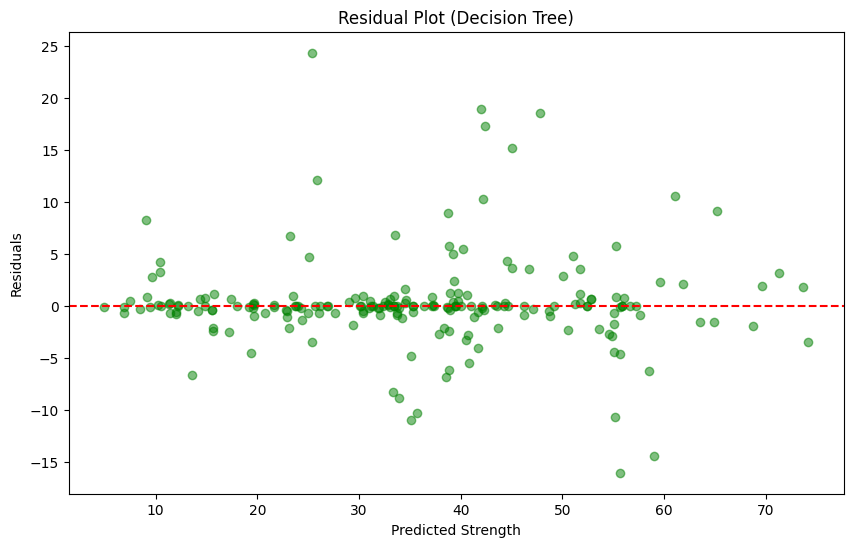

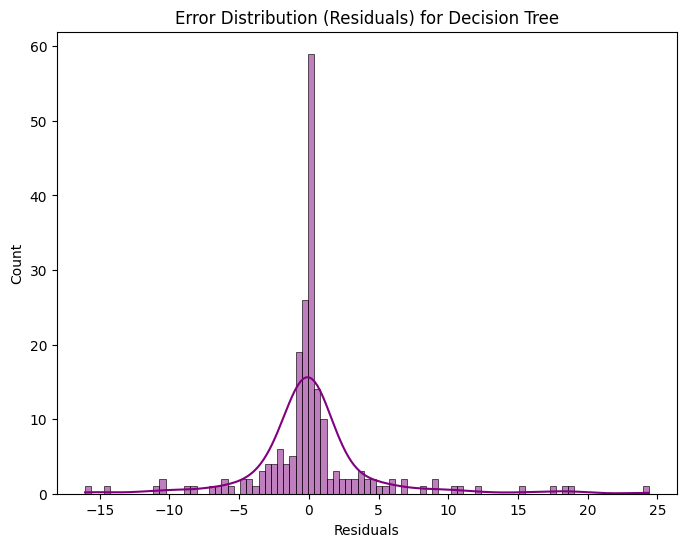

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assign path dataset
file_path = '/content/sample_data/MaterialStrength.csv'
data = pd.read_csv(file_path)

# Melakukan konversi dari kolom non-numerical menjadi numerical
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':  # If the column is non-numeric (object type)
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))  # Convert to numeric
        label_encoders[column] = le

# Bagi datanya menjadi features (X) dan target (y)
X = data.drop(columns=['target_feature'])  # Features berisi semua kolom kecuali target_feature
y = data['target_feature']  # Target berisi hanya target_feature

# Bagi 2 menjadi training data dan test data (80(Training data) : 20(Test data))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi agar semua data bernilai sama
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

# 2. K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_scaled, y_train)

# 3. Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# 4. Polynomial Regression (using PolynomialFeatures)
poly_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_regressor.fit(X_train_scaled, y_train)

# Prediksi
y_pred_dt = dt_regressor.predict(X_test_scaled)
y_pred_knn = knn_regressor.predict(X_test_scaled)
y_pred_linear = linear_regressor.predict(X_test_scaled)
y_pred_poly = poly_regressor.predict(X_test_scaled)

# Evaluation metrics: Mean Squared Error (MSE) and R-squared (R²) for all models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

results = {
    'Model': ['Decision Tree', 'K-Nearest Neighbors', 'Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_dt, mse_knn, mse_linear, mse_poly],
    'R²': [r2_dt, r2_knn, r2_linear, r2_poly]
}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)

# Visualization: Predicted vs Actual Plot for Decision Tree
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111)
ax1.scatter(y_test, y_pred_dt, color='blue', label='Predictions (Decision Tree)', alpha=0.5)
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Strength')
ax1.set_ylabel('Predicted Strength')
ax1.set_title('Actual vs Predicted Values (Decision Tree)')
ax1.legend()
plt.show()

# Visualization: Residual Plot for Decision Tree
residuals_dt = y_test - y_pred_dt
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111)
ax2.scatter(y_pred_dt, residuals_dt, color='green', alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Strength')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot (Decision Tree)')
plt.show()

# Visualization: Error Distribution (Residuals) for Decision Tree
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111)
sns.histplot(residuals_dt, kde=True, color='purple', ax=ax3)
ax3.set_title('Error Distribution (Residuals) for Decision Tree')
ax3.set_xlabel('Residuals')
plt.show()